# Convolutional Neural Network Architecture

In [31]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
model=Sequential()

In [34]:
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))


#The first CNN layer followed by Relu and MaxPooling layers


In [35]:
model.add(Activation('relu'))

In [36]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [38]:
model.add(Flatten())
model.add(Dropout(0.5))

In [39]:
model.add(Dense(50,activation='relu')) #here 50 neurons in hidden layer 
model.add(Dense(2,activation='softmax'))

In [40]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [45]:

history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 54s 2s/step - loss: 0.1155 - accuracy: 0.9646 - val_loss: 0.0567 - val_accuracy: 0.9839
Epoch 2/20
31/31 [==============================] - 45s 1s/step - loss: 0.1049 - accuracy: 0.9545 - val_loss: 0.0907 - val_accuracy: 0.9677
Epoch 3/20
31/31 [==============================] - 47s 2s/step - loss: 0.0734 - accuracy: 0.9747 - val_loss: 0.0693 - val_accuracy: 0.9798
Epoch 4/20
31/31 [==============================] - 47s 2s/step - loss: 0.0329 - accuracy: 0.9879 - val_loss: 0.0733 - val_accuracy: 0.9758
Epoch 5/20
31/31 [==============================] - 47s 2s/step - loss: 0.0405 - accuracy: 0.9859 - val_loss: 0.0887 - val_accuracy: 0.9758
Epoch 6/20
31/31 [==============================] - 49s 2s/step - loss: 0.0375 - accuracy: 0.9859 - val_loss: 0.0677 - val_accuracy: 0.9677
Epoch 7/20
31/31 [==============================] - 48s 2s/step - loss: 0.0286 - accuracy: 0.9919 - val_loss: 0.0806 - val_accuracy: 0.9677
Epoch 8/20
31/31 [==

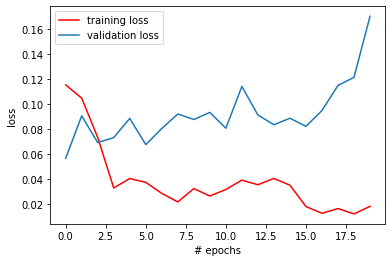

In [46]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

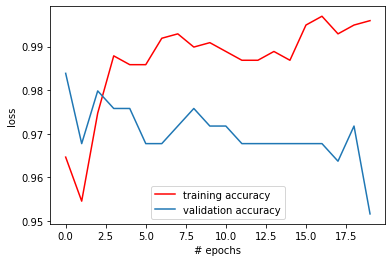

In [47]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [48]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 247ms/step - loss: 0.0391 - accuracy: 0.9855
[0.039140086621046066, 0.9855072498321533]
